<a href="https://colab.research.google.com/github/ZahraEk/Speech/blob/main/EX_Ezafi_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5314 sha256=c8f1f9f1c2959f1cf096e8c9ae540798eed3b8aebce9cca2bdd15feccee571c9
  Stored in directory: /root/.cache/pip/wheels/5b/cc/44/62f60769f89e834ab2124c69de4005c771e0ff06af908bbbf3
Successfully built dtw


In [50]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import librosa
import librosa.display
import IPython.display
from IPython.display import Image
import numpy as np
from dtw import dtw
%matplotlib inline

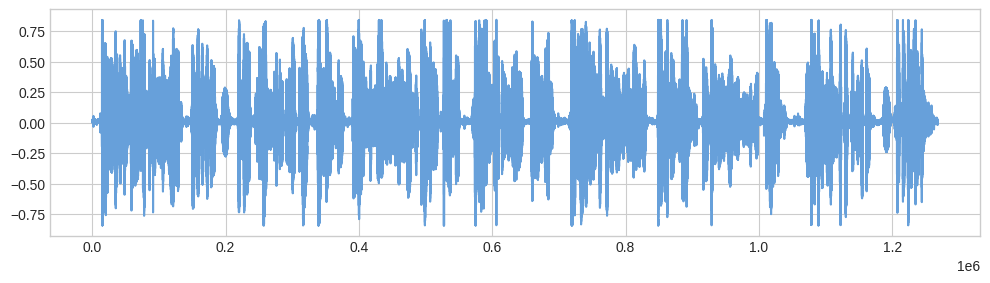

In [40]:
yTest, srTest = librosa.load('drive/MyDrive/Ex Ezafi/original.wav')

figure(figsize=(12,3), dpi=100)
plt.plot(yTest, color='#67A0DA')

#save figure
plt.savefig('drive/MyDrive/Ex Ezafi/original.jpg')

IPython.display.Audio(data=yTest, rate=srTest)

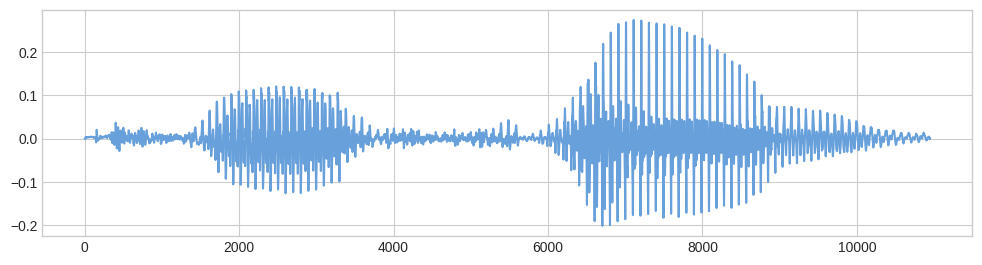

In [41]:
yTrain, srTrain = librosa.load('drive/MyDrive/Ex Ezafi/t.wav')

figure(figsize=(12,3), dpi=100)
plt.plot(yTrain, color='#67A0DA')

#save figure
plt.savefig('drive/MyDrive/Ex Ezafi/t.jpg')

IPython.display.Audio(data=yTrain, rate=srTrain)

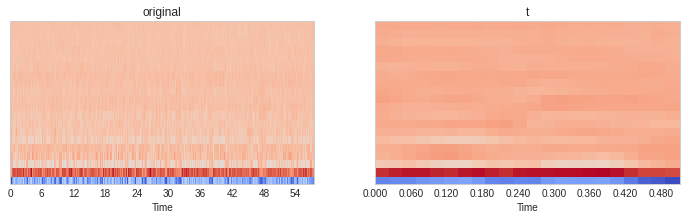

In [43]:
mfccTest = librosa.feature.mfcc(yTest, srTest)
mfccTrain = librosa.feature.mfcc(yTrain, srTrain)

#display mfccs
fig, ax = plt.subplots(ncols=2, figsize=(12,3))

librosa.display.specshow(mfccTest, x_axis="time", ax=ax[0])
librosa.display.specshow(mfccTrain, x_axis="time", ax=ax[1])

ax[0].set_title("original")
ax[1].set_title("t")

plt.show   

#save figure
fig.savefig('drive/MyDrive/Ex Ezafi/mfccs.jpg')

In [47]:
# Remove mean and normalize each column of MFCC 
import copy
def preprocess_mfcc(mfcc):
    mfcc_cp = copy.deepcopy(mfcc)
    for i in range(mfcc.shape[1]):
        mfcc_cp[:,i] = mfcc[:,i] - np.mean(mfcc[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp

mfccTest = preprocess_mfcc(mfccTest)
mfccTrain = preprocess_mfcc(mfccTrain)

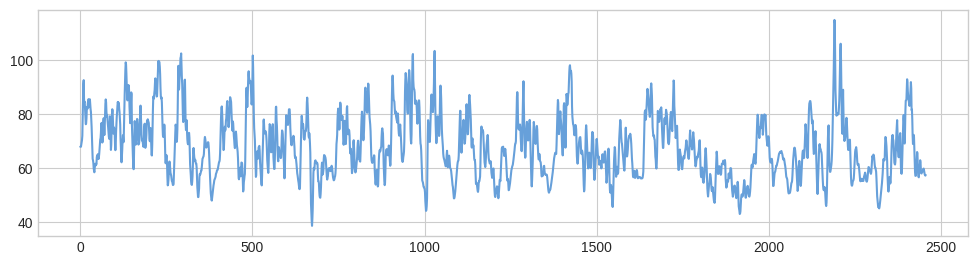

In [64]:
window_size = mfccTrain.shape[1]
dists = np.zeros(mfccTest.shape[1] - window_size)

for i in range(len(dists)):
    mfcci = mfccTest[:,i:i+window_size]
    dist1i = dtw(mfccTrain.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dists[i] = dist1i

figure(figsize=(12,3), dpi=100)
plt.plot(dists, color='#67A0DA')

In [63]:
# select minimum distance window
word_match_idx = dists.argmin()
# convert MFCC to time domain
word_match_idx_bnds = np.array([word_match_idx,np.ceil(word_match_idx+window_size)])
samples_per_mfcc = 512
word_samp_bounds = (2/2) + (word_match_idx_bnds*samples_per_mfcc)

word = yTest[int(word_samp_bounds[0]):int(word_samp_bounds[1])]

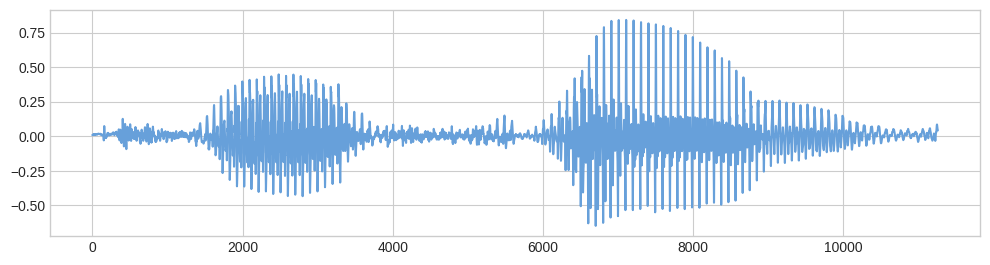

In [65]:
figure(figsize=(12,3), dpi=100)
plt.plot(word, color='#67A0DA')

IPython.display.Audio(data=word, rate=srTrain)